<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/TimeSeries/Augmented_Dickey_Fuller_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code runs Dicky-fuller test on AR(1) and AR(2) timeseries simulated data.<br> The code easily can extended for real data as well. <br>


<br><br>
---

Written by: Arjang Fahim
Date: 12/9/2021
Last update: 5/8/2022

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# adfuller: augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# This fucntion generates simulated ar data

def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [5]:
# This fucntion performs the DFT test
# If the pval < 0.05 it is stationary.

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

# AR_1 Process
# Stationary

Text(0.5, 1.0, 'Stationary AR(1) Process')

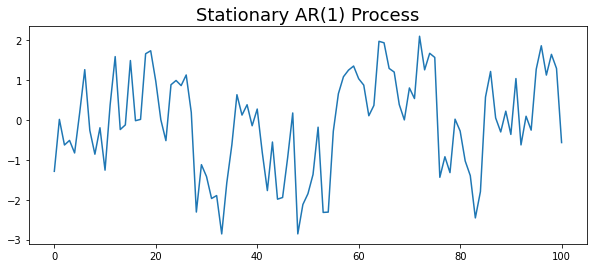

In [24]:
# generating the data with phi_1 = 0.5
ar_1_process = generate_ar_process(1, [0.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [25]:
# if the p-val < 0.05 then the series is stationary
perform_adf_test(ar_1_process)

ADF Statistic: -4.808057
p-value: 0.000052


# Non Stationary

Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

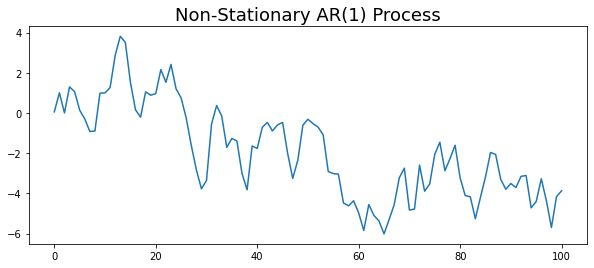

In [30]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [31]:
# if the p-val < 0.05 then the series is stationary
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -1.393404
p-value: 0.585434


# AR_2 Process
# Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

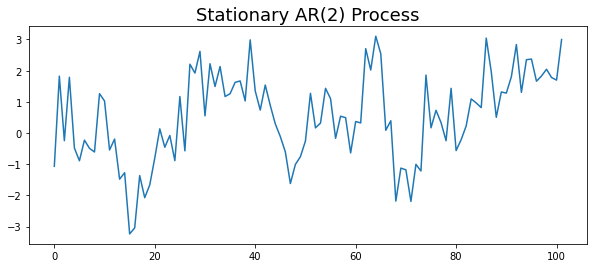

In [32]:
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [33]:
perform_adf_test(ar_2_process)

ADF Statistic: -2.659892
p-value: 0.081240


# Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

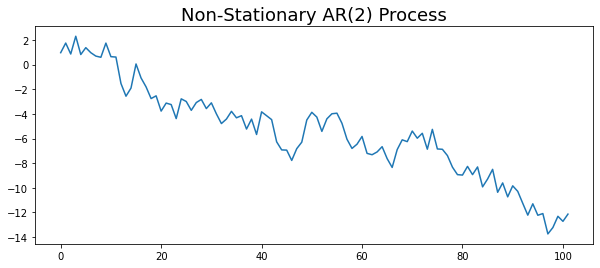

In [34]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)

In [35]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistic: -0.982290
p-value: 0.759669
